## SVD 실습

In [1]:
import numpy as np
import pandas as pd
from numpy.linalg import svd

C:\Users\TJ\anaconda3\envs\ml01-02\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [8]:
np.random.seed(121)
A = np.random.randn(4,4)
np.round(A,3)

array([[-0.212, -0.285, -0.574, -0.44 ],
       [-0.33 ,  1.184,  1.615,  0.367],
       [-0.014,  0.63 ,  1.71 , -1.327],
       [ 0.402, -0.191,  1.404, -1.969]])

In [9]:
U, Sigma, Vt = svd(A) # full svd()
print(U.shape, Sigma.shape, Vt.shape)

(4, 4) (4,) (4, 4)


In [29]:
print(U)

[[ 0.24568427  0.58278576 -0.07144804 -0.77129448]
 [-0.77441642 -0.01670951  0.55107295 -0.31035238]
 [-0.52873215  0.56607625 -0.55107295  0.31035238]
 [ 0.24568427  0.58278576  0.62252099  0.4609421 ]]


In [10]:
print('Sigma value : ', np.round(Sigma, 3))

Sigma value :  [3.423 2.023 0.463 0.079]


In [12]:
Sigma_mat = np.diag(Sigma)
print(Sigma)
print(Sigma_mat)
A_ = np.dot(np.dot(U,Sigma_mat), Vt)
print('원본데이터 A : ', A)
print('복원데이터 A_ : ', A_)

[3.4229581  2.02287339 0.46263157 0.07935069]
[[3.4229581  0.         0.         0.        ]
 [0.         2.02287339 0.         0.        ]
 [0.         0.         0.46263157 0.        ]
 [0.         0.         0.         0.07935069]]
원본데이터 A :  [[-0.21203317 -0.28492917 -0.57389821 -0.44031017]
 [-0.33011056  1.18369457  1.61537293  0.36706247]
 [-0.01411931  0.6296418   1.70964074 -1.32698736]
 [ 0.40187312 -0.19142667  1.40382596 -1.96876855]]
복원데이터 A_ :  [[-0.21203317 -0.28492917 -0.57389821 -0.44031017]
 [-0.33011056  1.18369457  1.61537293  0.36706247]
 [-0.01411931  0.6296418   1.70964074 -1.32698736]
 [ 0.40187312 -0.19142667  1.40382596 -1.96876855]]


In [13]:
A

array([[-0.21203317, -0.28492917, -0.57389821, -0.44031017],
       [-0.33011056,  1.18369457,  1.61537293,  0.36706247],
       [-0.01411931,  0.6296418 ,  1.70964074, -1.32698736],
       [ 0.40187312, -0.19142667,  1.40382596, -1.96876855]])

In [15]:
A[2] = A[0] + A[1]
A[3] = A[0]
print(np.round(A,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [16]:
U, Sigma, Vt = svd(A)
print('Sigma Value : \n', np.round(Sigma, 3))

Sigma Value : 
 [2.663 0.807 0.    0.   ]


In [17]:
U_ = U[:,:2]
U_

array([[ 0.24568427,  0.58278576],
       [-0.77441642, -0.01670951],
       [-0.52873215,  0.56607625],
       [ 0.24568427,  0.58278576]])

In [18]:
Sigma_ = np.diag(Sigma[:2])
Sigma_

array([[2.66335286, 0.        ],
       [0.        , 0.80703506]])

In [20]:
Vt_ = Vt[:2]
Vt_

array([[ 0.16449395, -0.57517122, -0.78233269, -0.17342252],
       [-0.67967123,  0.19439734, -0.13178782, -0.69490191]])

In [21]:
A_ = np.dot(np.dot(U_,Sigma_), Vt_)
A_

array([[-0.21203317, -0.28492917, -0.57389821, -0.44031017],
       [-0.33011056,  1.18369457,  1.61537293,  0.36706247],
       [-0.54214372,  0.8987654 ,  1.04147472, -0.0732477 ],
       [-0.21203317, -0.28492917, -0.57389821, -0.44031017]])

### Truncated SVD 를 이용한 행렬 분해
- scipy 이용 (page 397)
    - from scipy.sparse.linalg import svds
    - from scipy.linalg import svd

- sklearn 이용(page 398)
    - from sklearn.decomposition import TruncatedSVD
    - fit, transform 지원

#### sklearn 이용 -> iris dataset , PCA 비교

In [23]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [24]:
iris = load_iris()

In [26]:
iris_ftrs = iris.data
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs) 
iris_tsvd = tsvd.transform(iris_ftrs)
print('변환전 차원 \n',iris_ftrs.shape)
print('변환된 차원 \n',iris_tsvd.shape)

변환전 차원 
 (150, 4)
변환된 차원 
 (150, 2)


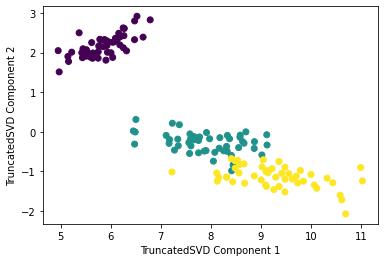

In [27]:
plt.scatter(
      x=iris_tsvd[:,0] 
    , y=iris_tsvd[:,1] 
    , c=iris.target    
)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')
plt.show()

Text(0.5, 1.0, 'PCA Transformed')

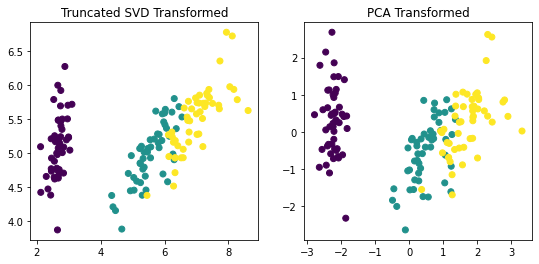

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_ftrs) # 차원 축소

pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled) # 차원 축소

fig, (ax1, ax2) = plt.subplots(
    figsize=(9,4)
    , ncols=2
)
ax1.scatter(
    x=iris_tsvd[:,0]
    , y=iris_tsvd[:,1]
    , c=iris.target
)
ax2.scatter(
    x=iris_pca[:,0]
    , y=iris_pca[:,1]
    , c=iris.target
)
ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed')

#### 6-4 NMF(비음수 행렬분해)
- 하나의 배열을 비음수(양수)으로 구성된 두개의 배열로 분해

C:\Users\TJ\anaconda3\envs\ml01-02\lib\site-packages\sklearn\decomposition\_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


Text(0.5, 1.0, 'NMF Transformed')

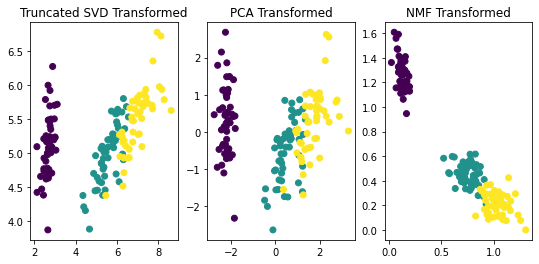

In [30]:
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris

iris = load_iris()
iris_ftrs = iris.data

nmf = NMF(n_components=2)
nmf.fit(iris_ftrs)
iris_nmf = nmf.transform(iris_ftrs)

fig, (ax1, ax2, ax3) = plt.subplots(figsize=(9,4), ncols=3)
ax1.scatter(x=iris_tsvd[:,0], y=iris_tsvd[:,1], c=iris.target)
ax2.scatter(x=iris_pca[:,0], y=iris_pca[:,1], c=iris.target)
ax3.scatter(x=iris_nmf[:,0], y=iris_nmf[:,1], c=iris.target)
ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed')
ax3.set_title('NMF Transformed')